In [ ]:
import os
import random
import re
from PIL import Image
from libtiff import TIFF
import numpy as np
from shutil import copyfile

DATA_PATH = '/home/yifanc3/dataset/data/'
FRAME_PATH = DATA_PATH+'frames_256_overlap6/'
MASK_PATH = DATA_PATH+'masks_10m_256overlap/'
MASK2_PATH = DATA_PATH+'masks_5m_256overlap/'
ANNO_PATH = DATA_PATH+'annotations_256_overlap/'
SAVE_PATH = '/home/yifanc3/dataset/data/selected_256_overlap/'


#annotated_mask
# this is wrong , we need to split annotation image to 64*64 too.
# annotated_mask = np.load(os.path.join(DATA_PATH,'annotated_mask.tif')) # only 0 has annotated 
                         
# Create folders to hold features and nonfeatures

folders = ['frame_0', 'mask_5m_0', 'frame_1', 'mask_5m_1', 'mask_10m_1', 'mask_10m_0']

# os.makedirs(SAVE_PATH)

for folder in folders:
    os.makedirs(SAVE_PATH + folder)

  
# Get all frames and masks, sort them, shuffle them to generate data sets.

all_frames = os.listdir(FRAME_PATH)
all_masks = os.listdir(MASK_PATH)

# Record Numbers

In [6]:


#read all the masks to see if 1/0 >= 10/(64*64)
# the ratio need to be calculated by histgram (plot histogram of how large ratio is the label/nolabel )
                         
Ratios = []
num_files = 0
num_anno = 0
num_no_anno = 0
num_feature_nonzero = 0
num_feature_file = 0
#select files with feature
for mask in all_masks:
    num_files += 1
    # load annotations
    filename = os.path.join(ANNO_PATH, mask)
    tif = TIFF.open(filename)
    anno_img = tif.read_image().astype(int) # 0 means annotated
    if 0 not in np.unique(anno_img):
        num_no_anno += 1
        continue
#     print('annoted:',mask)
    num_anno += 1
    #load mask image
    filename = os.path.join(MASK_PATH, mask)
    tif = TIFF.open(filename)
    mask_arr = tif.read_image().astype(int)
#     mask_arr = np.where(mask_arr==2.0, 0.0, mask_arr)
#     mask_arr = 1 - mask_arr # so 1 is the mask
    # calculate ratio
    no_1 = np.count_nonzero(mask_arr)
    ratio = no_1/(128*128)
    if(no_1 != 0):
        Ratios.append(ratio)
        num_feature_nonzero += 1
    if(no_1 >= 100):
        num_feature_file += 1
        # load frames
#         filename = os.path.join(FRAME_PATH, mask)
#         tif = TIFF.open(filename)
#         frame_arr = tif.read_image()
        # save to file masks_1 and load frames
#         np.save(os.path.join(SAVE_PATH+'frame_1/',mask[0:-4]+'.npy'), frame_arr)
#         np.save(os.path.join(SAVE_PATH+'mask_1/',mask[0:-4]+'.npy'),mask_arr)
    
print(num_files,num_anno, num_no_anno, num_feature_nonzero, num_feature_file)
    

20216 7365 12851 1804 1705


In [7]:
len(Ratios)

1804

In [9]:
print(num_files)
print(num_anno)
print(num_feature_file)

38
1
2300


# Run for selections

In [2]:
num_feature_file = 1705
num_anno = 7365
num_feature_nonzero = 1804
#read all the masks to see if 1/0 >= 10/(64*64)
# the ratio need to be calculated by histgram (plot histogram of how large ratio is the label/nolabel )

random_list = np.concatenate((np.ones(num_feature_file),np.zeros(num_anno-num_feature_nonzero-num_feature_file))) #print(a,b,'\t',darray) 
np.random.shuffle(random_list)

num_files = 0
num_anno = 0
num_no_anno = 0 
# add to num_files
num_feature_nonzero = 0 
num_feature_zero = 0 #count index for random_list
# add to num_anno
num_feature_file = 0 
num_nofeature_file = 0 # these two number should be the same

#select files with feature and without feature
for mask in all_masks:
    num_files += 1
    # load annotations
    filename = os.path.join(ANNO_PATH, mask)
    tif = TIFF.open(filename)
    anno_img = tif.read_image().astype(int) # 0 means annotated
    if 0 not in np.unique(anno_img):
        num_no_anno += 1
        continue
    # annoated 
    print('annoted:',mask)
    num_anno += 1
    #load mask image
    filename = os.path.join(MASK_PATH, mask)
    tif = TIFF.open(filename)
    mask_arr = tif.read_image().astype(int)
#     mask_arr = np.where(mask_arr==2.0, 0.0, mask_arr)
#     mask_arr = 1 - mask_arr # so 1 is the mask
    # calculate ratio
    no_1 = np.count_nonzero(mask_arr)
    print(no_1)
            
    if(no_1 != 0):
        num_feature_nonzero += 1
    else: # no feature but annotated 
        if random_list[num_feature_zero] != 1:
            num_feature_zero += 1 
            continue
        filename = os.path.join(FRAME_PATH, mask)
        tif = TIFF.open(filename)
        frame_arr = tif.read_image()
        # save to file masks_1 and load frames
        print('nonfeature file')
        np.save(os.path.join(SAVE_PATH+'frame_0/',mask[0:-4]+'.npy'), frame_arr)
        np.save(os.path.join(SAVE_PATH+'mask_10m_0/',mask[0:-4]+'.npy'),mask_arr)
        
        num_feature_zero += 1 
        num_nofeature_file += 1
    if(no_1 >= 100):
        print('feature file')
        num_feature_file += 1
        # load frames
        filename = os.path.join(FRAME_PATH, mask)
        tif = TIFF.open(filename)
        frame_arr = tif.read_image()
        # save to file masks_1 and load frames
        np.save(os.path.join(SAVE_PATH+'frame_1/',mask[0:-4]+'.npy'), frame_arr)
        np.save(os.path.join(SAVE_PATH+'mask_10m_1/',mask[0:-4]+'.npy'),mask_arr)
    
print(num_files,num_anno, num_no_anno, num_feature_nonzero, num_feature_zero, num_feature_file, num_nofeature_file)
    

annoted: 001_017.tif
0
annoted: 001_018.tif
0
annoted: 001_019.tif
0
annoted: 001_020.tif
0
annoted: 001_021.tif
0
annoted: 001_022.tif
242
feature file
annoted: 001_023.tif
242
feature file
annoted: 001_024.tif
0
nonfeature file
annoted: 001_025.tif
0
annoted: 001_026.tif
0
annoted: 001_027.tif
0
annoted: 001_028.tif
0
annoted: 002_014.tif
0
annoted: 002_015.tif
0
nonfeature file
annoted: 002_016.tif
0
annoted: 002_017.tif
0
annoted: 002_018.tif
0
nonfeature file
annoted: 002_019.tif
0
annoted: 002_020.tif
0
annoted: 002_021.tif
0
annoted: 002_022.tif
1109
feature file
annoted: 002_023.tif
1109
feature file
annoted: 002_024.tif
0
annoted: 002_025.tif
0
nonfeature file
annoted: 002_026.tif
0
annoted: 002_027.tif
0
annoted: 002_028.tif
0
nonfeature file
annoted: 002_029.tif
0
nonfeature file
annoted: 003_013.tif
0
annoted: 003_014.tif
0
annoted: 003_015.tif
0
annoted: 003_016.tif
0
annoted: 003_017.tif
0
annoted: 003_018.tif
0
annoted: 003_019.tif
0
annoted: 003_020.tif
0
annoted: 003_0

annoted: 012_009.tif
0
annoted: 012_010.tif
1057
feature file
annoted: 012_011.tif
1057
feature file
annoted: 012_012.tif
0
annoted: 012_013.tif
0
nonfeature file
annoted: 012_014.tif
0
annoted: 012_015.tif
0
annoted: 012_016.tif
0
annoted: 012_017.tif
2527
feature file
annoted: 012_018.tif
2697
feature file
annoted: 012_019.tif
170
feature file
annoted: 012_020.tif
0
annoted: 012_021.tif
1061
feature file
annoted: 012_022.tif
1061
feature file
annoted: 012_023.tif
0
nonfeature file
annoted: 012_024.tif
0
annoted: 012_025.tif
0
nonfeature file
annoted: 012_026.tif
0
annoted: 012_027.tif
0
annoted: 012_028.tif
0
nonfeature file
annoted: 012_029.tif
0
annoted: 012_030.tif
0
annoted: 012_031.tif
0
nonfeature file
annoted: 012_032.tif
0
annoted: 012_033.tif
0
nonfeature file
annoted: 012_034.tif
0
annoted: 012_035.tif
0
annoted: 012_036.tif
0
nonfeature file
annoted: 012_037.tif
0
annoted: 012_038.tif
0
nonfeature file
annoted: 012_039.tif
0
annoted: 012_040.tif
0
annoted: 012_041.tif
0
an

annoted: 019_026.tif
0
annoted: 019_027.tif
0
annoted: 019_028.tif
0
nonfeature file
annoted: 019_029.tif
0
annoted: 019_030.tif
0
nonfeature file
annoted: 019_031.tif
0
annoted: 019_032.tif
0
annoted: 019_033.tif
0
nonfeature file
annoted: 019_034.tif
0
annoted: 019_035.tif
0
annoted: 019_036.tif
421
feature file
annoted: 019_037.tif
1467
feature file
annoted: 019_038.tif
1046
feature file
annoted: 019_039.tif
0
annoted: 019_040.tif
0
annoted: 019_041.tif
0
annoted: 019_042.tif
0
nonfeature file
annoted: 019_043.tif
0
annoted: 019_044.tif
0
annoted: 019_045.tif
0
annoted: 019_046.tif
0
annoted: 020_007.tif
0
nonfeature file
annoted: 020_008.tif
0
annoted: 020_009.tif
0
annoted: 020_010.tif
0
annoted: 020_011.tif
0
annoted: 020_012.tif
0
annoted: 020_013.tif
0
annoted: 020_014.tif
0
annoted: 020_015.tif
0
annoted: 020_016.tif
0
annoted: 020_017.tif
0
nonfeature file
annoted: 020_018.tif
0
annoted: 020_019.tif
0
annoted: 020_020.tif
0
annoted: 020_021.tif
0
annoted: 020_022.tif
0
annote

annoted: 026_024.tif
0
annoted: 026_025.tif
0
annoted: 026_026.tif
0
annoted: 026_027.tif
0
annoted: 026_028.tif
0
annoted: 026_029.tif
0
annoted: 026_030.tif
119
feature file
annoted: 026_031.tif
119
feature file
annoted: 026_032.tif
0
annoted: 026_033.tif
1106
feature file
annoted: 026_034.tif
1106
feature file
annoted: 026_035.tif
0
annoted: 026_036.tif
0
annoted: 026_037.tif
0
annoted: 026_038.tif
0
annoted: 026_039.tif
0
nonfeature file
annoted: 026_040.tif
0
annoted: 026_041.tif
0
annoted: 026_042.tif
0
annoted: 026_043.tif
0
nonfeature file
annoted: 026_044.tif
0
nonfeature file
annoted: 026_045.tif
0
annoted: 026_046.tif
0
annoted: 026_047.tif
0
nonfeature file
annoted: 026_048.tif
0
nonfeature file
annoted: 026_049.tif
0
nonfeature file
annoted: 027_007.tif
0
nonfeature file
annoted: 027_008.tif
0
annoted: 027_009.tif
0
nonfeature file
annoted: 027_010.tif
0
annoted: 027_011.tif
0
annoted: 027_012.tif
0
annoted: 027_013.tif
0
annoted: 027_014.tif
0
annoted: 027_015.tif
0
nonfe

annoted: 033_007.tif
0
annoted: 033_008.tif
0
annoted: 033_009.tif
0
annoted: 033_010.tif
0
annoted: 033_011.tif
0
annoted: 033_012.tif
0
annoted: 033_013.tif
0
nonfeature file
annoted: 033_014.tif
0
annoted: 033_015.tif
0
annoted: 033_016.tif
0
annoted: 033_017.tif
0
annoted: 033_018.tif
0
annoted: 033_019.tif
0
annoted: 033_020.tif
0
annoted: 033_021.tif
0
annoted: 033_022.tif
0
annoted: 033_023.tif
0
nonfeature file
annoted: 033_024.tif
0
annoted: 033_025.tif
0
nonfeature file
annoted: 033_026.tif
0
nonfeature file
annoted: 033_027.tif
0
annoted: 033_028.tif
0
nonfeature file
annoted: 033_029.tif
0
annoted: 033_030.tif
0
annoted: 033_031.tif
0
annoted: 033_032.tif
0
annoted: 033_033.tif
0
annoted: 033_034.tif
0
nonfeature file
annoted: 033_035.tif
0
nonfeature file
annoted: 033_036.tif
0
annoted: 033_037.tif
0
annoted: 033_038.tif
0
annoted: 033_039.tif
0
annoted: 033_040.tif
0
annoted: 033_041.tif
0
annoted: 033_042.tif
0
annoted: 033_043.tif
0
annoted: 033_044.tif
0
annoted: 033_0

annoted: 039_033.tif
1151
feature file
annoted: 039_034.tif
20
annoted: 039_035.tif
0
annoted: 039_036.tif
0
nonfeature file
annoted: 039_037.tif
0
annoted: 039_038.tif
1762
feature file
annoted: 039_039.tif
1771
feature file
annoted: 039_040.tif
9
annoted: 039_041.tif
1064
feature file
annoted: 039_042.tif
1064
feature file
annoted: 039_043.tif
0
annoted: 039_044.tif
0
annoted: 039_045.tif
0
nonfeature file
annoted: 039_046.tif
1633
feature file
annoted: 039_047.tif
2455
feature file
annoted: 039_048.tif
822
feature file
annoted: 039_049.tif
0
annoted: 039_050.tif
0
annoted: 039_051.tif
0
annoted: 039_052.tif
0
annoted: 039_053.tif
0
nonfeature file
annoted: 039_054.tif
0
nonfeature file
annoted: 039_055.tif
0
annoted: 039_056.tif
0
annoted: 040_007.tif
0
nonfeature file
annoted: 040_008.tif
0
nonfeature file
annoted: 040_009.tif
0
annoted: 040_010.tif
0
nonfeature file
annoted: 040_011.tif
0
annoted: 040_012.tif
0
nonfeature file
annoted: 040_013.tif
0
annoted: 040_014.tif
0
annoted:

annoted: 044_047.tif
0
annoted: 044_048.tif
0
annoted: 044_049.tif
0
annoted: 044_050.tif
0
annoted: 044_051.tif
0
annoted: 044_052.tif
0
nonfeature file
annoted: 044_053.tif
0
annoted: 044_054.tif
0
annoted: 044_055.tif
0
annoted: 044_056.tif
0
annoted: 044_057.tif
0
nonfeature file
annoted: 044_058.tif
0
annoted: 045_006.tif
0
annoted: 045_007.tif
0
annoted: 045_008.tif
0
annoted: 045_009.tif
0
annoted: 045_010.tif
0
nonfeature file
annoted: 045_011.tif
0
annoted: 045_012.tif
0
annoted: 045_013.tif
0
annoted: 045_014.tif
1382
feature file
annoted: 045_015.tif
2554
feature file
annoted: 045_016.tif
1172
feature file
annoted: 045_017.tif
0
nonfeature file
annoted: 045_018.tif
0
annoted: 045_019.tif
0
annoted: 045_020.tif
0
nonfeature file
annoted: 045_021.tif
0
nonfeature file
annoted: 045_022.tif
0
nonfeature file
annoted: 045_023.tif
0
annoted: 045_024.tif
0
annoted: 045_025.tif
0
annoted: 045_026.tif
0
annoted: 045_027.tif
0
nonfeature file
annoted: 045_028.tif
0
annoted: 045_029.ti

annoted: 049_060.tif
0
annoted: 049_061.tif
0
annoted: 050_006.tif
0
nonfeature file
annoted: 050_007.tif
0
annoted: 050_008.tif
0
annoted: 050_009.tif
0
annoted: 050_010.tif
0
annoted: 050_011.tif
0
annoted: 050_012.tif
0
nonfeature file
annoted: 050_013.tif
0
annoted: 050_014.tif
0
annoted: 050_015.tif
0
annoted: 050_016.tif
0
annoted: 050_017.tif
0
annoted: 050_018.tif
0
annoted: 050_019.tif
0
annoted: 050_020.tif
0
annoted: 050_021.tif
0
nonfeature file
annoted: 050_022.tif
0
nonfeature file
annoted: 050_023.tif
0
annoted: 050_024.tif
0
annoted: 050_025.tif
0
annoted: 050_026.tif
0
nonfeature file
annoted: 050_027.tif
0
annoted: 050_028.tif
0
annoted: 050_029.tif
0
nonfeature file
annoted: 050_030.tif
0
annoted: 050_031.tif
0
annoted: 050_032.tif
0
annoted: 050_033.tif
0
annoted: 050_034.tif
0
nonfeature file
annoted: 050_035.tif
0
annoted: 050_036.tif
0
annoted: 050_037.tif
0
nonfeature file
annoted: 050_038.tif
0
nonfeature file
annoted: 050_039.tif
2503
feature file
annoted: 050

annoted: 055_007.tif
0
annoted: 055_008.tif
0
annoted: 055_009.tif
0
annoted: 055_010.tif
0
annoted: 055_011.tif
0
annoted: 055_012.tif
0
annoted: 055_013.tif
0
nonfeature file
annoted: 055_014.tif
0
nonfeature file
annoted: 055_015.tif
0
annoted: 055_016.tif
848
feature file
annoted: 055_017.tif
1131
feature file
annoted: 055_018.tif
283
feature file
annoted: 055_019.tif
0
nonfeature file
annoted: 055_020.tif
0
annoted: 055_021.tif
0
annoted: 055_022.tif
0
nonfeature file
annoted: 055_023.tif
0
annoted: 055_024.tif
0
nonfeature file
annoted: 055_025.tif
0
nonfeature file
annoted: 055_026.tif
0
annoted: 055_027.tif
0
annoted: 055_028.tif
0
annoted: 055_029.tif
0
annoted: 055_030.tif
1022
feature file
annoted: 055_031.tif
1022
feature file
annoted: 055_032.tif
0
annoted: 055_033.tif
0
annoted: 055_034.tif
0
annoted: 055_035.tif
0
annoted: 055_036.tif
0
nonfeature file
annoted: 055_037.tif
0
annoted: 055_038.tif
0
nonfeature file
annoted: 055_039.tif
0
annoted: 055_040.tif
0
nonfeature f

0
annoted: 059_060.tif
0
annoted: 059_061.tif
0
nonfeature file
annoted: 059_062.tif
0
nonfeature file
annoted: 059_063.tif
0
annoted: 059_064.tif
0
annoted: 059_065.tif
0
nonfeature file
annoted: 059_066.tif
0
annoted: 060_008.tif
0
annoted: 060_009.tif
0
nonfeature file
annoted: 060_010.tif
0
nonfeature file
annoted: 060_011.tif
0
nonfeature file
annoted: 060_012.tif
0
annoted: 060_013.tif
0
annoted: 060_014.tif
0
annoted: 060_015.tif
0
annoted: 060_016.tif
0
annoted: 060_017.tif
0
annoted: 060_018.tif
0
annoted: 060_019.tif
649
feature file
annoted: 060_020.tif
1035
feature file
annoted: 060_021.tif
386
feature file
annoted: 060_022.tif
0
annoted: 060_023.tif
0
nonfeature file
annoted: 060_024.tif
0
nonfeature file
annoted: 060_025.tif
0
annoted: 060_026.tif
0
nonfeature file
annoted: 060_027.tif
0
nonfeature file
annoted: 060_028.tif
0
annoted: 060_029.tif
0
annoted: 060_030.tif
0
annoted: 060_031.tif
0
nonfeature file
annoted: 060_032.tif
0
nonfeature file
annoted: 060_033.tif
115

annoted: 064_055.tif
25
annoted: 064_056.tif
25
annoted: 064_057.tif
0
annoted: 064_058.tif
0
nonfeature file
annoted: 064_059.tif
0
nonfeature file
annoted: 064_060.tif
0
annoted: 064_061.tif
0
annoted: 064_062.tif
0
annoted: 064_063.tif
0
annoted: 064_064.tif
0
nonfeature file
annoted: 064_065.tif
0
nonfeature file
annoted: 064_066.tif
0
annoted: 064_067.tif
0
annoted: 064_068.tif
0
annoted: 065_010.tif
0
nonfeature file
annoted: 065_011.tif
0
annoted: 065_012.tif
0
annoted: 065_013.tif
0
nonfeature file
annoted: 065_014.tif
0
nonfeature file
annoted: 065_015.tif
0
annoted: 065_016.tif
0
annoted: 065_017.tif
0
annoted: 065_018.tif
0
annoted: 065_019.tif
0
annoted: 065_020.tif
1362
feature file
annoted: 065_021.tif
3949
feature file
annoted: 065_022.tif
2587
feature file
annoted: 065_023.tif
0
nonfeature file
annoted: 065_024.tif
0
annoted: 065_025.tif
0
nonfeature file
annoted: 065_026.tif
0
nonfeature file
annoted: 065_027.tif
0
annoted: 065_028.tif
0
annoted: 065_029.tif
0
nonfeatu

nonfeature file
annoted: 069_058.tif
0
annoted: 069_059.tif
0
annoted: 069_060.tif
0
annoted: 069_061.tif
0
annoted: 069_062.tif
0
annoted: 069_063.tif
0
annoted: 069_064.tif
0
annoted: 069_065.tif
1075
feature file
annoted: 069_066.tif
1771
feature file
annoted: 069_067.tif
696
feature file
annoted: 069_068.tif
0
annoted: 069_069.tif
0
annoted: 069_070.tif
0
annoted: 070_015.tif
0
nonfeature file
annoted: 070_016.tif
0
annoted: 070_017.tif
0
nonfeature file
annoted: 070_018.tif
0
annoted: 070_019.tif
0
annoted: 070_020.tif
0
nonfeature file
annoted: 070_021.tif
0
annoted: 070_022.tif
0
annoted: 070_023.tif
0
nonfeature file
annoted: 070_024.tif
0
annoted: 070_025.tif
0
annoted: 070_026.tif
0
annoted: 070_027.tif
0
annoted: 070_028.tif
0
annoted: 070_029.tif
0
nonfeature file
annoted: 070_030.tif
0
annoted: 070_031.tif
0
nonfeature file
annoted: 070_032.tif
0
annoted: 070_033.tif
0
annoted: 070_034.tif
1065
feature file
annoted: 070_035.tif
1065
feature file
annoted: 070_036.tif
1564
f

annoted: 074_040.tif
2208
feature file
annoted: 074_041.tif
0
annoted: 074_042.tif
0
annoted: 074_043.tif
0
annoted: 074_044.tif
0
nonfeature file
annoted: 074_045.tif
0
annoted: 074_046.tif
0
nonfeature file
annoted: 074_047.tif
0
annoted: 074_048.tif
15
annoted: 074_049.tif
15
annoted: 074_050.tif
0
nonfeature file
annoted: 074_051.tif
0
annoted: 074_052.tif
0
annoted: 074_053.tif
0
annoted: 074_054.tif
0
nonfeature file
annoted: 074_055.tif
0
nonfeature file
annoted: 074_056.tif
0
annoted: 074_057.tif
0
annoted: 074_058.tif
0
annoted: 074_059.tif
518
feature file
annoted: 074_060.tif
1150
feature file
annoted: 074_061.tif
632
feature file
annoted: 074_062.tif
0
annoted: 074_063.tif
0
nonfeature file
annoted: 074_064.tif
38
annoted: 074_065.tif
59
annoted: 074_066.tif
607
feature file
annoted: 074_067.tif
616
feature file
annoted: 074_068.tif
335
feature file
annoted: 074_069.tif
305
feature file
annoted: 074_070.tif
0
annoted: 074_071.tif
0
annoted: 074_072.tif
0
annoted: 074_073.ti

0
annoted: 079_041.tif
107
feature file
annoted: 079_042.tif
988
feature file
annoted: 079_043.tif
1108
feature file
annoted: 079_044.tif
227
feature file
annoted: 079_045.tif
0
annoted: 079_046.tif
0
annoted: 079_047.tif
0
nonfeature file
annoted: 079_048.tif
0
annoted: 079_049.tif
0
annoted: 079_050.tif
0
annoted: 079_051.tif
0
annoted: 079_052.tif
0
annoted: 079_053.tif
0
annoted: 079_054.tif
0
nonfeature file
annoted: 079_055.tif
0
nonfeature file
annoted: 079_056.tif
986
feature file
annoted: 079_057.tif
986
feature file
annoted: 079_058.tif
0
annoted: 079_059.tif
0
nonfeature file
annoted: 079_060.tif
0
annoted: 079_061.tif
0
nonfeature file
annoted: 079_062.tif
2738
feature file
annoted: 079_063.tif
2738
feature file
annoted: 079_064.tif
0
annoted: 079_065.tif
0
nonfeature file
annoted: 079_066.tif
0
annoted: 079_067.tif
0
annoted: 079_068.tif
0
nonfeature file
annoted: 079_069.tif
0
annoted: 079_070.tif
0
annoted: 079_071.tif
0
annoted: 079_072.tif
0
nonfeature file
annoted: 07

annoted: 083_048.tif
0
annoted: 083_049.tif
0
annoted: 083_050.tif
0
annoted: 083_051.tif
1051
feature file
annoted: 083_052.tif
1057
feature file
annoted: 083_053.tif
43
annoted: 083_054.tif
37
annoted: 083_055.tif
0
annoted: 083_056.tif
0
annoted: 083_057.tif
0
annoted: 083_058.tif
287
feature file
annoted: 083_059.tif
1218
feature file
annoted: 083_060.tif
2992
feature file
annoted: 083_061.tif
2961
feature file
annoted: 083_062.tif
3147
feature file
annoted: 083_063.tif
3295
feature file
annoted: 083_064.tif
1048
feature file
annoted: 083_065.tif
0
nonfeature file
annoted: 083_066.tif
0
annoted: 083_067.tif
192
feature file
annoted: 083_068.tif
1280
feature file
annoted: 083_069.tif
1841
feature file
annoted: 083_070.tif
753
feature file
annoted: 083_071.tif
0
annoted: 083_072.tif
0
nonfeature file
annoted: 083_073.tif
0
nonfeature file
annoted: 083_074.tif
940
feature file
annoted: 083_075.tif
940
feature file
annoted: 083_076.tif
0
annoted: 083_077.tif
0
annoted: 083_078.tif
0
an

0
annoted: 087_045.tif
0
annoted: 087_046.tif
329
feature file
annoted: 087_047.tif
1070
feature file
annoted: 087_048.tif
741
feature file
annoted: 087_049.tif
0
annoted: 087_050.tif
816
feature file
annoted: 087_051.tif
2587
feature file
annoted: 087_052.tif
1918
feature file
annoted: 087_053.tif
147
feature file
annoted: 087_054.tif
0
annoted: 087_055.tif
0
annoted: 087_056.tif
0
annoted: 087_057.tif
0
annoted: 087_058.tif
0
nonfeature file
annoted: 087_059.tif
0
annoted: 087_060.tif
0
annoted: 087_061.tif
0
nonfeature file
annoted: 087_062.tif
0
annoted: 087_063.tif
0
annoted: 087_064.tif
0
annoted: 087_065.tif
0
annoted: 087_066.tif
0
annoted: 087_067.tif
1180
feature file
annoted: 087_068.tif
2116
feature file
annoted: 087_069.tif
1986
feature file
annoted: 087_070.tif
1050
feature file
annoted: 087_071.tif
0
nonfeature file
annoted: 087_072.tif
0
annoted: 087_073.tif
0
nonfeature file
annoted: 087_074.tif
0
nonfeature file
annoted: 087_075.tif
0
annoted: 087_076.tif
0
nonfeature

annoted: 090_089.tif
0
annoted: 090_090.tif
0
annoted: 090_091.tif
0
annoted: 090_092.tif
0
nonfeature file
annoted: 090_093.tif
0
nonfeature file
annoted: 090_094.tif
0
annoted: 090_095.tif
0
annoted: 090_096.tif
0
annoted: 090_097.tif
0
annoted: 090_098.tif
0
annoted: 090_099.tif
0
nonfeature file
annoted: 091_023.tif
0
nonfeature file
annoted: 091_024.tif
0
annoted: 091_025.tif
0
annoted: 091_026.tif
0
annoted: 091_027.tif
0
nonfeature file
annoted: 091_028.tif
0
nonfeature file
annoted: 091_029.tif
0
nonfeature file
annoted: 091_030.tif
0
nonfeature file
annoted: 091_031.tif
0
annoted: 091_032.tif
0
annoted: 091_033.tif
0
annoted: 091_034.tif
0
annoted: 091_035.tif
0
annoted: 091_036.tif
0
annoted: 091_037.tif
0
nonfeature file
annoted: 091_038.tif
0
nonfeature file
annoted: 091_039.tif
0
annoted: 091_040.tif
0
nonfeature file
annoted: 091_041.tif
0
annoted: 091_042.tif
0
annoted: 091_043.tif
1227
feature file
annoted: 091_044.tif
2181
feature file
annoted: 091_045.tif
954
feature 

annoted: 094_064.tif
520
feature file
annoted: 094_065.tif
0
nonfeature file
annoted: 094_066.tif
0
nonfeature file
annoted: 094_067.tif
0
annoted: 094_068.tif
0
annoted: 094_069.tif
0
annoted: 094_070.tif
0
annoted: 094_071.tif
0
nonfeature file
annoted: 094_072.tif
0
annoted: 094_073.tif
0
annoted: 094_074.tif
0
nonfeature file
annoted: 094_075.tif
0
annoted: 094_076.tif
5
annoted: 094_077.tif
5
annoted: 094_078.tif
0
nonfeature file
annoted: 094_079.tif
0
nonfeature file
annoted: 094_080.tif
0
annoted: 094_081.tif
0
annoted: 094_082.tif
0
annoted: 094_083.tif
0
annoted: 094_084.tif
0
annoted: 094_085.tif
0
annoted: 094_086.tif
0
nonfeature file
annoted: 094_087.tif
0
nonfeature file
annoted: 094_088.tif
0
annoted: 094_089.tif
0
annoted: 094_090.tif
690
feature file
annoted: 094_091.tif
1004
feature file
annoted: 094_092.tif
770
feature file
annoted: 094_093.tif
1877
feature file
annoted: 094_094.tif
1421
feature file
annoted: 094_095.tif
0
annoted: 094_096.tif
0
annoted: 094_097.tif

annoted: 097_101.tif
0
annoted: 097_102.tif
235
feature file
annoted: 097_103.tif
235
feature file
annoted: 097_104.tif
0
annoted: 097_105.tif
0
annoted: 097_106.tif
0
nonfeature file
annoted: 097_107.tif
0
annoted: 097_108.tif
0
nonfeature file
annoted: 097_109.tif
0
nonfeature file
annoted: 097_110.tif
0
annoted: 098_031.tif
0
annoted: 098_032.tif
0
annoted: 098_033.tif
0
annoted: 098_034.tif
0
annoted: 098_035.tif
0
nonfeature file
annoted: 098_036.tif
0
nonfeature file
annoted: 098_037.tif
1072
feature file
annoted: 098_038.tif
3151
feature file
annoted: 098_039.tif
2079
feature file
annoted: 098_040.tif
0
nonfeature file
annoted: 098_041.tif
0
annoted: 098_042.tif
0
nonfeature file
annoted: 098_043.tif
596
feature file
annoted: 098_044.tif
596
feature file
annoted: 098_045.tif
0
annoted: 098_046.tif
0
annoted: 098_047.tif
0
nonfeature file
annoted: 098_048.tif
0
nonfeature file
annoted: 098_049.tif
0
nonfeature file
annoted: 098_050.tif
595
feature file
annoted: 098_051.tif
1382
f

0
annoted: 101_074.tif
0
annoted: 101_075.tif
0
annoted: 101_076.tif
0
annoted: 101_077.tif
0
annoted: 101_078.tif
0
nonfeature file
annoted: 101_079.tif
0
annoted: 101_080.tif
0
annoted: 101_081.tif
0
annoted: 101_082.tif
0
nonfeature file
annoted: 101_083.tif
0
annoted: 101_084.tif
0
annoted: 101_085.tif
0
annoted: 101_086.tif
0
nonfeature file
annoted: 101_087.tif
0
nonfeature file
annoted: 101_088.tif
0
annoted: 101_089.tif
0
nonfeature file
annoted: 101_090.tif
0
nonfeature file
annoted: 101_091.tif
0
nonfeature file
annoted: 101_092.tif
0
annoted: 101_093.tif
0
annoted: 101_094.tif
0
nonfeature file
annoted: 101_095.tif
0
annoted: 101_096.tif
0
annoted: 101_097.tif
0
annoted: 101_098.tif
0
nonfeature file
annoted: 101_099.tif
0
annoted: 101_100.tif
0
nonfeature file
annoted: 101_101.tif
0
annoted: 101_102.tif
0
annoted: 101_103.tif
0
annoted: 101_104.tif
1060
feature file
annoted: 101_105.tif
1137
feature file
annoted: 101_106.tif
77
annoted: 101_107.tif
989
feature file
annoted:

annoted: 104_121.tif
1246
feature file
annoted: 104_122.tif
0
nonfeature file
annoted: 105_043.tif
0
annoted: 105_044.tif
0
annoted: 105_045.tif
0
annoted: 105_046.tif
0
annoted: 105_047.tif
0
annoted: 105_048.tif
0
nonfeature file
annoted: 105_049.tif
0
annoted: 105_050.tif
0
annoted: 105_051.tif
0
nonfeature file
annoted: 105_052.tif
0
nonfeature file
annoted: 105_053.tif
0
annoted: 105_054.tif
0
annoted: 105_055.tif
0
annoted: 105_056.tif
0
nonfeature file
annoted: 105_057.tif
0
nonfeature file
annoted: 105_058.tif
0
nonfeature file
annoted: 105_059.tif
0
nonfeature file
annoted: 105_060.tif
0
annoted: 105_061.tif
0
annoted: 105_062.tif
0
annoted: 105_063.tif
0
annoted: 105_064.tif
12
annoted: 105_065.tif
466
feature file
annoted: 105_066.tif
2107
feature file
annoted: 105_067.tif
1653
feature file
annoted: 105_068.tif
0
annoted: 105_069.tif
0
nonfeature file
annoted: 105_070.tif
0
annoted: 105_071.tif
0
annoted: 105_072.tif
1052
feature file
annoted: 105_073.tif
1052
feature file
a

0
nonfeature file
annoted: 108_083.tif
0
annoted: 108_084.tif
0
annoted: 108_085.tif
0
nonfeature file
annoted: 108_086.tif
0
annoted: 108_087.tif
0
annoted: 108_088.tif
0
annoted: 108_089.tif
0
nonfeature file
annoted: 108_090.tif
0
annoted: 108_091.tif
0
annoted: 108_092.tif
0
annoted: 108_093.tif
0
annoted: 108_094.tif
0
annoted: 108_095.tif
0
annoted: 108_096.tif
0
nonfeature file
annoted: 108_097.tif
0
nonfeature file
annoted: 108_098.tif
0
annoted: 108_099.tif
0
annoted: 108_100.tif
0
annoted: 108_101.tif
0
annoted: 108_102.tif
0
annoted: 108_103.tif
0
annoted: 108_104.tif
0
annoted: 108_105.tif
0
annoted: 108_106.tif
1
annoted: 108_107.tif
1188
feature file
annoted: 108_108.tif
1187
feature file
annoted: 108_109.tif
0
annoted: 108_110.tif
0
annoted: 108_111.tif
0
annoted: 108_112.tif
0
annoted: 108_113.tif
0
annoted: 108_114.tif
827
feature file
annoted: 108_115.tif
827
feature file
annoted: 108_116.tif
0
annoted: 108_117.tif
273
feature file
annoted: 108_118.tif
273
feature fil

annoted: 111_125.tif
0
nonfeature file
annoted: 111_126.tif
0
nonfeature file
annoted: 111_127.tif
0
annoted: 111_128.tif
0
annoted: 111_129.tif
995
feature file
annoted: 111_130.tif
995
feature file
annoted: 111_131.tif
0
annoted: 111_132.tif
0
annoted: 111_133.tif
0
nonfeature file
annoted: 111_134.tif
0
annoted: 111_135.tif
0
nonfeature file
annoted: 111_136.tif
0
annoted: 111_137.tif
0
annoted: 111_138.tif
0
annoted: 111_139.tif
0
nonfeature file
annoted: 111_140.tif
0
annoted: 111_141.tif
0
annoted: 111_142.tif
0
nonfeature file
annoted: 111_143.tif
0
annoted: 111_144.tif
0
nonfeature file
annoted: 111_145.tif
0
annoted: 111_146.tif
0
annoted: 111_147.tif
0
nonfeature file
annoted: 111_148.tif
0
annoted: 112_064.tif
0
annoted: 112_065.tif
0
nonfeature file
annoted: 112_066.tif
0
nonfeature file
annoted: 112_067.tif
0
annoted: 112_068.tif
0
annoted: 112_069.tif
0
nonfeature file
annoted: 112_070.tif
0
annoted: 112_071.tif
1057
feature file
annoted: 112_072.tif
2349
feature file
ann

annoted: 114_129.tif
1755
feature file
annoted: 114_130.tif
1790
feature file
annoted: 114_131.tif
1177
feature file
annoted: 114_132.tif
1606
feature file
annoted: 114_133.tif
1056
feature file
annoted: 114_134.tif
0
nonfeature file
annoted: 114_135.tif
264
feature file
annoted: 114_136.tif
1435
feature file
annoted: 114_137.tif
1171
feature file
annoted: 114_138.tif
639
feature file
annoted: 114_139.tif
1309
feature file
annoted: 114_140.tif
2536
feature file
annoted: 114_141.tif
2571
feature file
annoted: 114_142.tif
2448
feature file
annoted: 114_143.tif
2365
feature file
annoted: 114_144.tif
2120
feature file
annoted: 114_145.tif
1967
feature file
annoted: 114_146.tif
469
feature file
annoted: 114_147.tif
0
annoted: 114_148.tif
0
annoted: 114_149.tif
0
annoted: 114_150.tif
0
annoted: 115_072.tif
0
annoted: 115_073.tif
0
annoted: 115_074.tif
0
nonfeature file
annoted: 115_075.tif
48
annoted: 115_076.tif
959
feature file
annoted: 115_077.tif
1628
feature file
annoted: 115_078.tif
26

annoted: 118_080.tif
0
annoted: 118_081.tif
0
nonfeature file
annoted: 118_082.tif
0
annoted: 118_083.tif
0
annoted: 118_084.tif
0
annoted: 118_085.tif
0
annoted: 118_086.tif
0
annoted: 118_087.tif
0
nonfeature file
annoted: 118_088.tif
0
annoted: 118_089.tif
0
annoted: 118_090.tif
0
annoted: 118_091.tif
0
nonfeature file
annoted: 118_092.tif
0
nonfeature file
annoted: 118_093.tif
0
annoted: 118_094.tif
0
annoted: 118_095.tif
0
annoted: 118_096.tif
0
annoted: 118_097.tif
0
annoted: 118_098.tif
0
nonfeature file
annoted: 118_099.tif
347
feature file
annoted: 118_100.tif
1058
feature file
annoted: 118_101.tif
711
feature file
annoted: 118_102.tif
0
annoted: 118_103.tif
0
annoted: 118_104.tif
912
feature file
annoted: 118_105.tif
3619
feature file
annoted: 118_106.tif
4542
feature file
annoted: 118_107.tif
4223
feature file
annoted: 118_108.tif
5576
feature file
annoted: 118_109.tif
4884
feature file
annoted: 118_110.tif
1701
feature file
annoted: 118_111.tif
1709
feature file
annoted: 11

annoted: 122_124.tif
2087
feature file
annoted: 122_125.tif
1240
feature file
annoted: 122_126.tif
1012
feature file
annoted: 122_127.tif
2564
feature file
annoted: 122_128.tif
3064
feature file
annoted: 122_129.tif
1512
feature file
annoted: 122_130.tif
767
feature file
annoted: 122_131.tif
2063
feature file
annoted: 122_132.tif
1296
feature file
annoted: 122_133.tif
1055
feature file
annoted: 122_134.tif
1055
feature file
annoted: 122_135.tif
0
annoted: 122_136.tif
0
nonfeature file
annoted: 122_137.tif
0
annoted: 122_138.tif
0
annoted: 122_139.tif
0
annoted: 122_140.tif
0
annoted: 122_141.tif
0
annoted: 122_142.tif
0
nonfeature file
annoted: 122_143.tif
0
annoted: 122_144.tif
0
annoted: 122_145.tif
0
annoted: 122_146.tif
0
nonfeature file
annoted: 122_147.tif
0
annoted: 122_148.tif
0
nonfeature file
annoted: 122_149.tif
0
nonfeature file
annoted: 122_150.tif
0
annoted: 122_151.tif
0
annoted: 122_152.tif
0
nonfeature file
annoted: 123_106.tif
0
annoted: 123_107.tif
0
nonfeature file


annoted: 128_144.tif
0
annoted: 128_145.tif
228
feature file
annoted: 128_146.tif
2319
feature file
annoted: 128_147.tif
2091
feature file
annoted: 128_148.tif
0
nonfeature file
annoted: 128_149.tif
0
nonfeature file
annoted: 128_150.tif
0
nonfeature file
annoted: 128_151.tif
0
nonfeature file
annoted: 129_125.tif
0
nonfeature file
annoted: 129_126.tif
0
annoted: 129_127.tif
0
annoted: 129_128.tif
0
annoted: 129_129.tif
0
annoted: 129_130.tif
0
annoted: 129_131.tif
0
annoted: 129_132.tif
0
nonfeature file
annoted: 129_133.tif
0
nonfeature file
annoted: 129_134.tif
0
nonfeature file
annoted: 129_135.tif
0
annoted: 129_136.tif
0
nonfeature file
annoted: 129_137.tif
2532
feature file
annoted: 129_138.tif
5528
feature file
annoted: 129_139.tif
3976
feature file
annoted: 129_140.tif
1691
feature file
annoted: 129_141.tif
1826
feature file
annoted: 129_142.tif
1638
feature file
annoted: 129_143.tif
523
feature file
annoted: 129_144.tif
0
annoted: 129_145.tif
0
annoted: 129_146.tif
0
annoted:

In [19]:
print(num_files)
print(num_anno)
print(num_nonfeature_file)

20502
7097
6368


In [5]:
array = np.nonzero(np.array(Ratios))
Ratios = np.array(Ratios)
print(Ratios[array])

[0.00653076 0.00653076 0.03204346 ... 0.00744629 0.00744629 0.00024414]


In [6]:
print(len(Ratios[array]))

2967


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter


(array([69., 52., 51., 27., 55., 41., 39., 47., 40., 32., 46., 40., 50.,
        56., 38., 49., 71., 29., 47., 33., 40., 31., 29., 33., 35., 21.,
        47., 33., 53., 27., 28., 22., 43., 29., 38., 43., 35., 27., 35.,
        45., 35., 36., 27., 39., 38., 25., 66., 61., 50., 69., 62., 40.,
        41., 56., 29., 37., 39., 35., 28., 27., 23., 19., 28., 14., 16.,
        15., 14., 22., 15., 12., 20.,  9., 11.,  7., 11., 11., 14., 11.,
         6.,  3.,  6., 13., 16.,  5.,  6.,  6.,  8.,  6.,  7.,  6.,  2.,
         3.,  4.,  3.,  6.,  8.,  5.,  5.,  6.,  4.]),
 array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
          90.,  100.,  110.,  120.,  130.,  140.,  150.,  160.,  170.,
         180.,  190.,  200.,  210.,  220.,  230.,  240.,  250.,  260.,
         270.,  280.,  290.,  300.,  310.,  320.,  330.,  340.,  350.,
         360.,  370.,  380.,  390.,  400.,  410.,  420.,  430.,  440.,
         450.,  460.,  470.,  480.,  490.,  500.,  510.,  520.,  530.,
        

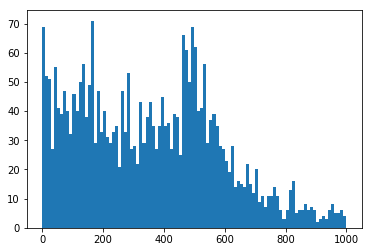

In [11]:
n_bins = 100
plt.hist(Ratios[array]*128*128, bins=n_bins, range = (0,1000))

In [43]:
np.random.randint(2, size=81703)

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1])